<a href="https://colab.research.google.com/github/13Aryanvats/python_works/blob/main/EmployeeAttritionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Employee Attrition Using Machine Learning

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys,traceback

In [8]:
!pip install -q gdown
import gdown

# Download the file
file_id = '1JcbdJMbdUYzzys-1__yzfLcciIH6bk3t'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'data.csv', quiet=False)

hr_data = pd.read_csv('data.csv')
hr_data.head()


Downloading...
From: https://drive.google.com/uc?id=1JcbdJMbdUYzzys-1__yzfLcciIH6bk3t
To: /content/data.csv
100%|██████████| 883k/883k [00:00<00:00, 10.2MB/s]


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [9]:
#Import Data
hr = hr_data
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary', 'Attrition']

Sample data:


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [10]:
hr=hr.rename(columns = {'Department':'department'})
#Display data type for each column
hr.dtypes


,0
satisfaction_level,float64
last_evaluation_rating,float64
projects_worked_on,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
promotion_last_5years,int64
department,object
salary,object
Attrition,int64


In [11]:
#Check for Missing Values
hr.isnull().any()


,0
satisfaction_level,False
last_evaluation_rating,False
projects_worked_on,False
average_montly_hours,False
time_spend_company,False
Work_accident,False
promotion_last_5years,False
department,False
salary,False
Attrition,False


In [12]:
#Dimensions of our dataset
hr.shape

(25491, 10)

In [13]:
#Summary for each variable
hr.describe()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
count,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000
mean,6.137704,7.167832,4.215174,205.286846,3.497156,0.146012,0.021419,0.234985
std,2.486316,1.710754,1.324228,50.182916,1.457715,0.353125,0.144780,0.423998
min,0.900000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,4.400000,5.600000,3.000000,160.000000,3.000000,0.000000,0.000000,0.000000
50%,6.500000,7.200000,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000
75%,8.200000,8.700000,5.000000,249.000000,4.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,8.000000,320.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
#To get the unique values for department
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [15]:
#Combine "technical","support" and "IT" into one department
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [16]:
#Print the updated values of departments
print(hr['department'].unique())


['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


# Data Exploration

In [17]:
hr['Attrition'].value_counts()

,count
Attrition,
0,19501
1,5990


In [20]:

hr.groupby('Attrition')[hr.select_dtypes(include='number').columns].mean()


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
Attrition,,,,,,,,
0,6.668899,7.159582,4.198041,203.199836,3.378647,0.176247,0.026665,0.0
1,4.408347,7.194691,4.270952,212.081302,3.882972,0.047579,0.004341,1.0


In [22]:
hr.groupby('department')[hr.select_dtypes(include='number').columns].mean()


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
department,,,,,,,,
RandD,6.186966,7.095356,4.250936,204.902622,3.361049,0.173783,0.034457,0.153558
accounting,5.835790,7.193845,4.224924,205.725684,3.530395,0.127660,0.018237,0.265957
hr,6.037272,7.072720,4.078509,203.311657,3.357653,0.122125,0.021412,0.283902
management,6.218932,7.247423,4.262418,205.244611,4.299906,0.160262,0.111528,0.134958
marketing,6.200756,7.165430,4.087973,203.987629,3.578694,0.158763,0.050172,0.229553
product_mng,6.200727,7.185535,4.223910,203.686262,3.456407,0.149934,0.000000,0.218626
sales,6.164850,7.110125,4.183995,205.039581,3.541804,0.143984,0.023519,0.240212
technical,6.137237,7.212923,4.257805,206.091864,3.410974,0.145222,0.008798,0.245317


In [24]:
hr.groupby('salary')[hr.select_dtypes(include='number').columns].mean()


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
salary,,,,,,,,
high,6.386124,7.049012,4.170743,203.784102,3.686736,0.153340,0.060207,0.066792
low,6.019963,7.180714,4.215674,205.429090,3.441506,0.144884,0.008385,0.291945
medium,6.222742,7.176300,4.223226,205.417351,3.523353,0.145868,0.028644,0.203156


## Data Visualization

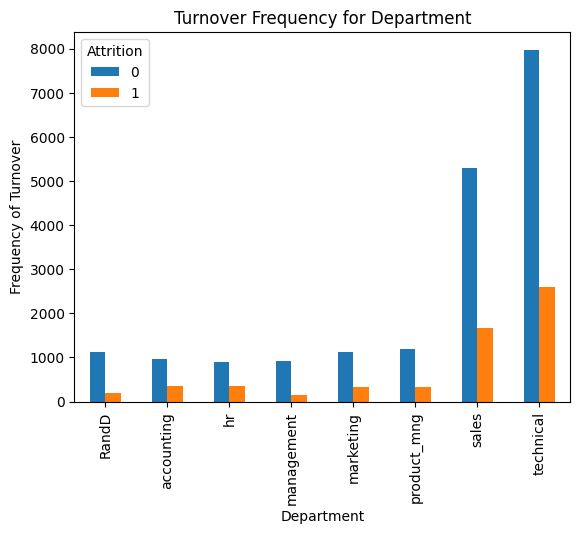

In [25]:
%matplotlib inline

#Bar chart for department employee work for and the frequency of turnover
pd.crosstab(hr['department'],hr['Attrition']).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

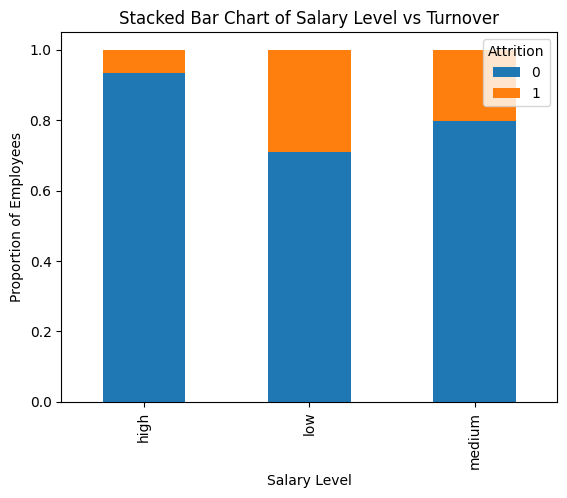

In [26]:
#Bar chart for employee salary level and the frequency of turnover
table=pd.crosstab(hr.salary, hr.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [27]:
#Proportion of employees left by department
pd.crosstab(hr.department, hr.Attrition)

Attrition,0,1
department,,
RandD,1130,205
accounting,966,350
hr,903,358
management,923,144
marketing,1121,334
product_mng,1183,331
sales,5298,1675
technical,7977,2593


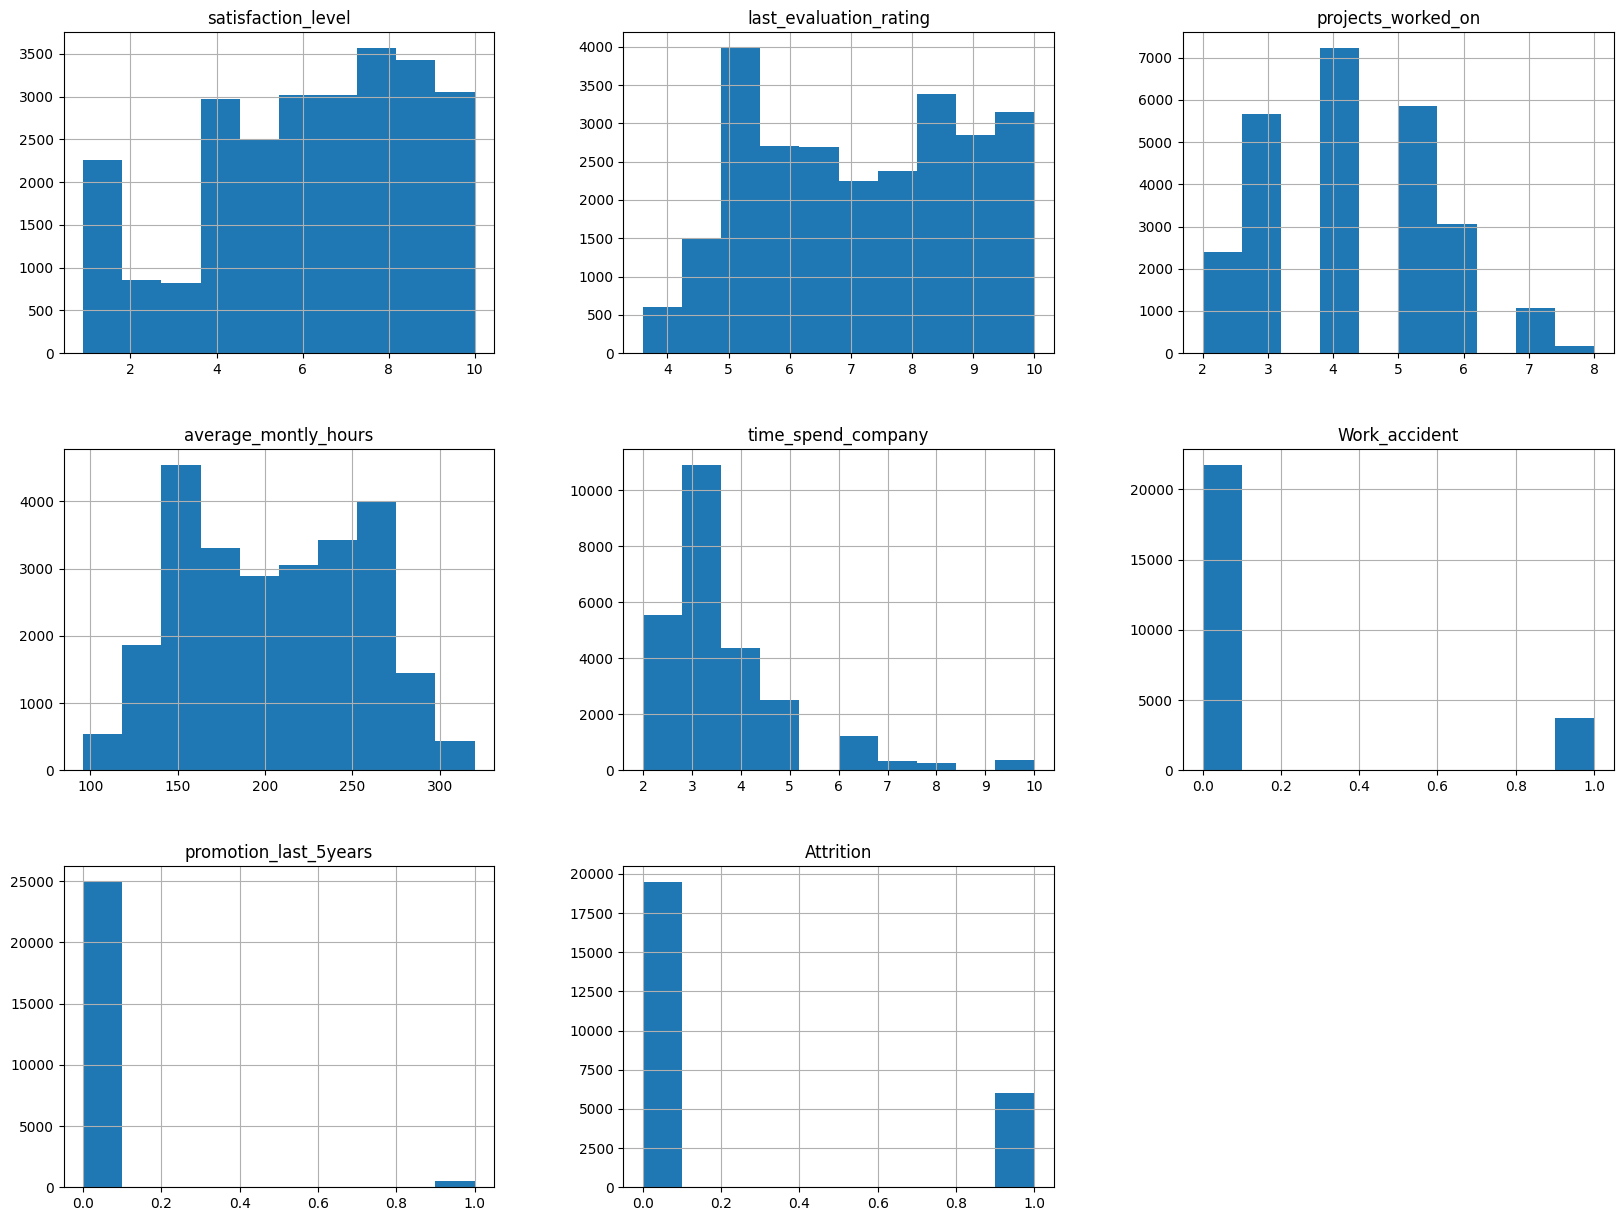

In [28]:
#Histogram of numeric variables
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [29]:
hr.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [30]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [31]:
hr.drop(hr.columns[[7, 8]], axis=1, inplace=True)

In [32]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation_rating',
       'projects_worked_on', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'Attrition',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales',
       'department_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

In [33]:
hr.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False
1,8.0,8.6,6,272,6,0,0,1,False,False,False,False,False,False,True,False,False,False,True
2,1.1,8.8,8,282,4,0,0,1,False,False,False,False,False,False,True,False,False,False,True
3,3.7,5.2,3,169,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False
4,4.1,5.0,3,163,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False


In [34]:
hr_vars=hr.columns.values.tolist()
y=['Attrition']
X=[i for i in hr_vars if i not in y]

In [35]:
X

['satisfaction_level',
 'last_evaluation_rating',
 'projects_worked_on',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

## Feature Selection

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(estimator=model, n_features_to_select=10)
rfe = rfe.fit(hr[X], hr[y])

print(rfe.support_)
print(rfe.ranking_)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

[ True False False False  True  True  True  True False  True  True False
 False False False  True  True  True]
[1 3 2 9 1 1 1 1 4 1 1 6 8 7 5 1 1 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
cols=['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium']
X=hr[cols]
y=hr['Attrition']

### Logistic Regression Model

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [41]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.766


### Random Forest

In [42]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.965


### Support Vector Machine

In [44]:
#SVM Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [45]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.891


### XGBoost Classifier

In [46]:
from xgboost import XGBClassifier

In [47]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
print('XGBoost accuracy: {:.3f}'.format(accuracy_score(y_test, xgb.predict(X_test))))

XGBoost accuracy: 0.962


### 10 Fold Cross Validation

In [51]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("Cross-validation average accuracy for Random Forest Classifier: %.3f" % results.mean())


Cross-validation average accuracy for Random Forest Classifier: 0.962


In [53]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
modelCV = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("Cross-validation average accuracy for SVM Classifier: %.3f" % results.mean())


Cross-validation average accuracy for SVM Classifier: 0.891


In [55]:
#For XGBoost
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
modelCV = XGBClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("cross validation average accuracy for XGBoost Classifier: %.3f" % (results.mean()))

cross validation average accuracy for XGBoost Classifier: 0.960


### Classification Report

In [56]:
#Classification report for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5840
           1       0.91      0.94      0.93      1808

    accuracy                           0.96      7648
   macro avg       0.95      0.96      0.95      7648
weighted avg       0.97      0.96      0.96      7648



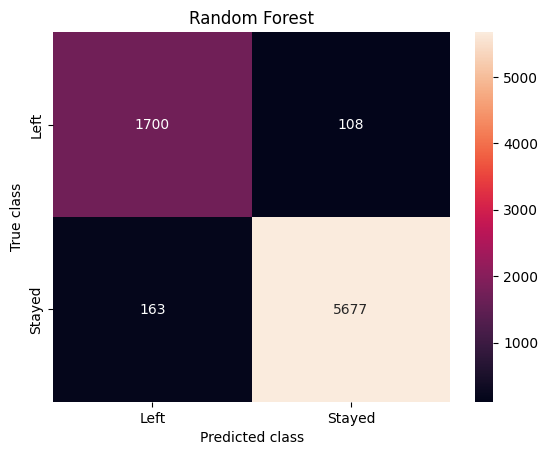

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = rf.predict(X_test)
forest_cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # True, Pred, Labels in correct order

sns.heatmap(forest_cm, annot=True, fmt='d',
            xticklabels=["Left", "Stayed"],
            yticklabels=["Left", "Stayed"])

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest.png')


In [59]:
#Classification report for Logistic Regression
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      5840
           1       0.51      0.26      0.34      1808

    accuracy                           0.77      7648
   macro avg       0.66      0.59      0.60      7648
weighted avg       0.73      0.77      0.74      7648



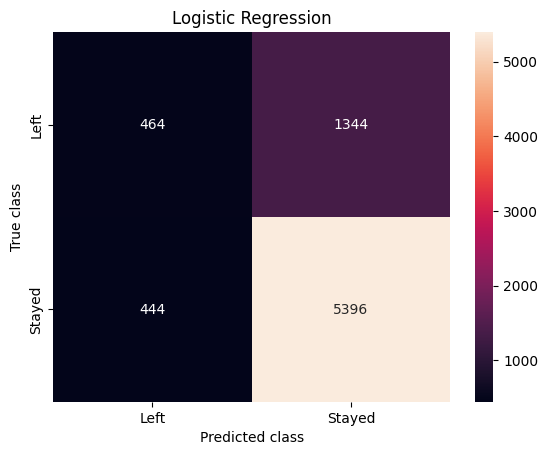

In [61]:
#Confusion matrix for logistic regression

logreg_y_pred = logreg.predict(X_test)
logreg_cm = confusion_matrix(y_test, logreg_y_pred, labels=[1, 0])

sns.heatmap(logreg_cm, annot=True, fmt='d',  # use 'd' for counts
            xticklabels=["Left", "Stayed"],
            yticklabels=["Left", "Stayed"])

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression.png')


In [62]:
#Classification report for SVM
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      5840
           1       0.75      0.82      0.78      1808

    accuracy                           0.89      7648
   macro avg       0.84      0.87      0.85      7648
weighted avg       0.90      0.89      0.89      7648



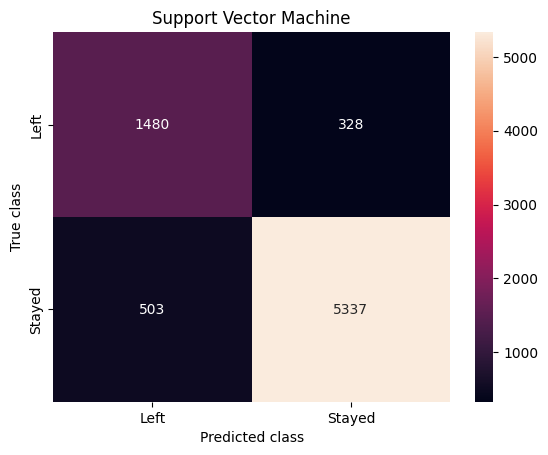

In [63]:
#Confusion Matrix for SVM
svc_y_pred = svc.predict(X_test)
svc_cm = confusion_matrix(y_test, svc_y_pred, labels=[1, 0])

sns.heatmap(svc_cm, annot=True, fmt='d',
            xticklabels=["Left", "Stayed"],
            yticklabels=["Left", "Stayed"])

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine.png')


In [64]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5840
           1       0.91      0.93      0.92      1808

    accuracy                           0.96      7648
   macro avg       0.95      0.95      0.95      7648
weighted avg       0.96      0.96      0.96      7648



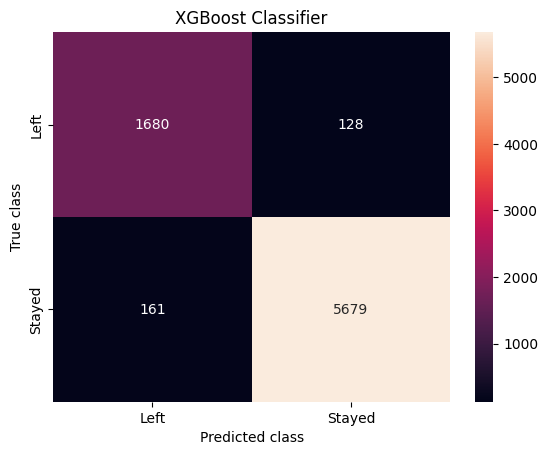

In [66]:
#Confusion Matrix for XGBoost Classifier
xgb_y_pred = xgb.predict(X_test)
xgb_cm = metrics.confusion_matrix(y_test, xgb_y_pred, labels=[1, 0])

sns.heatmap(xgb_cm, annot=True, fmt='d',
            xticklabels=["Left", "Stayed"],
            yticklabels=["Left", "Stayed"])

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGBoost Classifier')
plt.savefig('XGBoost_Classifier.png')


### Variable Importance for Random Forest Classifier

In [67]:
feature_labels = np.array(['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.31%
department_hr-0.38%
salary_medium-0.42%
department_RandD-0.43%
promotion_last_5years-0.46%
salary_high-0.83%
salary_low-1.04%
Work_accident-2.22%
time_spend_company-32.44%
satisfaction_level-61.48%


### Variable Importance for XGBoost Classifier

In [68]:
feature_labels = np.array(['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'])
importance = xgb.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-1.65%
department_RandD-2.19%
salary_medium-2.21%
department_hr-2.38%
salary_low-4.09%
promotion_last_5years-5.95%
Work_accident-6.85%
salary_high-7.48%
satisfaction_level-27.84%
time_spend_company-39.36%


## Hperparameter Tuning

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
 #Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [71]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [72]:
rf = RandomForestClassifier()

In [74]:
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [75]:
rf.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [76]:
rf.best_score_

np.float64(0.9656351898167557)

In [77]:
rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}